# Importing ODV aggregated spreadsheet data

In [4]:
using DIVAnd
using PyPlot
using NCDatasets
using Dates
using Statistics
using DelimitedFiles

## 1. Read spreadsheet file
🖋️ Indicate the path of an ODV file as the variable `datafile1`.          
If you don't have any, download a small test file (71 stations).

In [23]:
datafile1 = "../data/small_ODV_sample.txt"
if !isfile(datafile1)
    download("https://dox.ulg.ac.be/index.php/s/n7wDAB7G6IWWZtl/download", datafile1)
else
    @info "File already downloaded"
end

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1943k  100 1943k    0     0  1192k      0  0:00:01  0:00:01 --:--:-- 1193k


"../data/small_ODV_sample.txt"

🖋️ Set the variable name.

In [11]:
varname = "Water body salinity"

"Water body salinity"

In [12]:
obsval,obslon,obslat,obsdepth,obstime,obsid = ODVspreadsheet.load(Float64,[datafile1],
                           [varname]; nametype = :localname );

┌ Info: Reading data from file ../data/small_ODV_sample.txt
└ @ DIVAnd.ODVspreadsheet /home/ctroupin/.julia/packages/DIVAnd/dM13X/src/ODVspreadsheet.jl:81
┌ Info: No. of profiles in the file: 71
└ @ DIVAnd.ODVspreadsheet /home/ctroupin/.julia/packages/DIVAnd/dM13X/src/ODVspreadsheet.jl:250


Basic range check for the data

In [14]:
checkobs((obslon,obslat,obsdepth,obstime),obsval,obsid)

              minimum and maximum of obs. dimension 1: (16.72791, 17.98836)
              minimum and maximum of obs. dimension 2: (35.216, 36.25)
              minimum and maximum of obs. dimension 3: (0.0, 4020.61646)
              minimum and maximum of obs. dimension 4: (1966-02-13T05:00:00, 2016-11-24T10:39:00)
                          minimum and maximum of data: (37.1775, 39.313)


┌ Info: Checking ranges for dimensions and observations
└ @ DIVAnd /home/ctroupin/.julia/packages/DIVAnd/dM13X/src/obsstat.jl:75


### Quick plots
#### 🖋️ Plot the data locations

In [ ]:
...

#### 🖋️ the data values (scatter plot)

In [ ]:
...

## Data selection
### 🖋️ Select the data with a salinity below 39. 

In [18]:
sel = obsval .< ...;
obslon2 = obslon[sel]
...
...


(37.1775, 38.999)

Re-check the variable ranges using `checkobs`.

In [16]:
...

              minimum and maximum of obs. dimension 1: (16.72791, 17.98836)
              minimum and maximum of obs. dimension 2: (35.216, 36.25)
              minimum and maximum of obs. dimension 3: (0.0, 4020.61646)
              minimum and maximum of obs. dimension 4: (1966-02-13T05:00:00, 2016-11-24T10:39:00)
                          minimum and maximum of data: (37.1775, 39.212)


┌ Info: Checking ranges for dimensions and observations
└ @ DIVAnd /home/ctroupin/.julia/packages/DIVAnd/2RDHG/src/obsstat.jl:75


### 🖋️ Select the observations acquired in June

In [19]:
sel = Dates.month.(obstime) .== ...
obslon3 = obslon[sel]
...
...

28264-element BitArray{1}:
  true
  true
  true
  true
  true
  true
  true
  true
  true
  true
  true
  true
  true
     ⋮
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false

## 2. Read ODV netCDF
### 🖋️ Indicate the path of an ODV netCDF file or download one

In [26]:
datafilenc = "../data/small_ODV_sample.nc"
if !isfile(datafilenc)
    download("https://dox.ulg.ac.be/index.php/s/ugfCUjKlUollczU/download", datafilenc)
else
    @info "File already downloaded"
end

┌ Info: File already downloaded
└ @ Main In[26]:5


The function `NCODV.load` is designed to read netCDF files generated by ODV.    
In addition it has been optimised so large files (a few GB) can be ingested in a few minutes.

In [27]:
@time obsval, obslon, obslat, obsdepth, obstime, obsid = 
NCODV.load(Float64, datafilenc, "Water body salinity");

0 out of 71 - 0.0 %
  4.777178 seconds (11.42 M allocations: 580.913 MiB, 4.79% gc time)


#### 🖋️ Plot the data locations

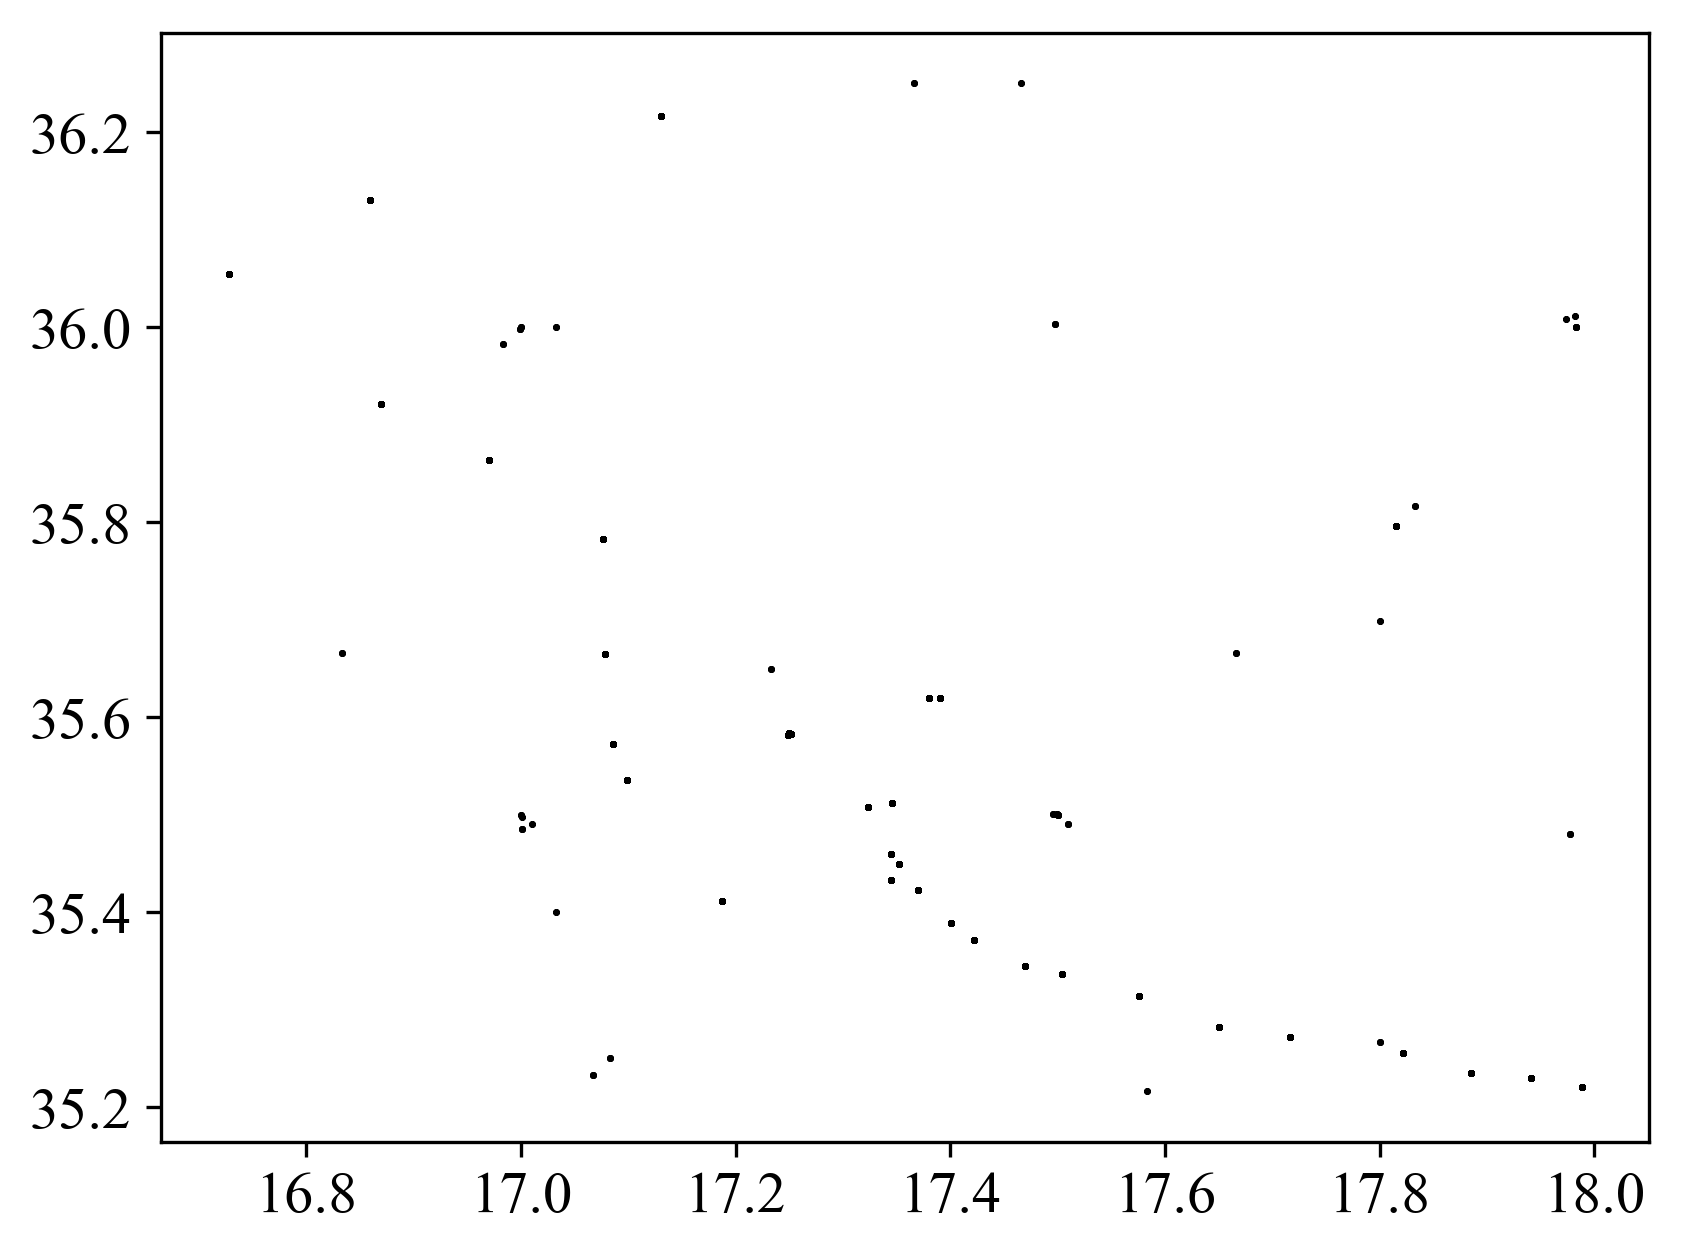

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0432a05550>

In [28]:
plot(obslon, obslat, "ko", markersize=0.5)